### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.linalg import svd

In [177]:
df = pd.read_csv('data/telco_churn_data.csv')

In [179]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [183]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [185]:
#Drop unnecessary object columns
df_clean = df.select_dtypes(include=[np.number])

# Replace empty strings or non-standard NaNs with actual NaNs for all columns
df_clean.replace('', np.nan, inplace=True)

# Drop rows where any column has NaN values
df_clean = df_clean.dropna()

print(df_clean.isna().sum())
df_clean.info()
df_clean.shape
df_clean.head(20)

Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Age                                  0
Number of Dependents                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Churn Value                          0
CLTV                                 0
Total Customer Svc Requests          0
Product/Service Issues Reported      0
Customer Satisfaction                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 3 to 7040
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             -

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
3,1,25,19.76,13,102.440,2514.50,13.43,327.00,494.00,78,1,90303,33.936291,-118.332639,27778,1,5337,1,1,2.0
4,1,37,6.33,15,79.560,2868.15,0.00,430.00,234.21,80,1,90602,33.972119,-118.020188,26265,1,2793,1,0,2.0
7,6,58,0.00,26,47.112,2651.20,40.95,689.00,0.00,66,0,91024,34.168686,-118.057505,10558,1,5444,2,1,1.0
8,0,15,44.07,21,77.428,1145.70,0.00,241.00,661.05,70,2,91106,34.139402,-118.128658,23742,1,5717,3,0,2.0
10,0,11,11.59,32,98.800,1120.30,0.00,358.00,127.49,78,1,91605,34.207295,-118.400022,57146,1,5980,2,2,1.0
13,0,3,0.00,31,42.796,132.20,0.00,41.00,0.00,67,0,91746,34.038983,-117.991372,30802,1,2314,7,1,2.0
14,0,13,32.68,12,111.176,1364.30,0.00,164.00,424.84,68,0,91748,33.976753,-117.897367,46342,1,2494,1,2,1.0
18,0,4,31.61,2,99.268,396.10,0.00,8.00,126.44,74,0,92122,32.857230,-117.209774,34902,1,3677,4,0,3.0
22,0,2,13.17,11,73.164,139.05,0.00,15.00,26.34,74,0,92122,32.857230,-117.209774,34902,1,2671,4,0,3.0
27,0,3,9.22,15,84.604,233.70,0.00,3.51,27.66,77,0,92122,32.857230,-117.209774,34902,1,2818,1,3,1.0


In [187]:
df_scaled = (df_clean - df_clean.mean()) / df_clean.std()
df_scaled.head()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
3,-0.299799,-0.244883,-0.213535,-0.439268,1.173535,0.134987,1.400621,0.016783,-0.268442,1.871807,0.559802,-1.679351,-0.898492,0.652618,0.249684,1.300836,0.810885,-0.822551,0.631326,-0.799922
4,-0.299799,0.244749,-1.085494,-0.346123,0.403649,0.293653,-0.258296,0.152433,-0.581076,1.991267,0.559802,-1.519232,-0.883909,0.798969,0.177646,1.300836,-1.348075,-0.822551,-0.568520,-0.799922
7,1.390949,1.101606,-1.496477,0.166179,-0.688189,0.196318,4.799981,0.493532,-0.862927,1.155053,-0.470998,-1.293245,-0.803901,0.781489,-0.570206,1.300836,0.901690,-0.045744,0.631326,-1.595506
8,-0.637949,-0.652910,1.364822,-0.066685,0.331910,-0.479127,-0.258296,-0.096477,-0.067413,1.393971,1.590602,-1.249333,-0.815820,0.748162,0.057519,1.300836,1.133371,0.731063,-0.568520,-0.799922
10,-0.637949,-0.816121,-0.743982,0.445617,1.051053,-0.490522,-0.258296,0.057610,-0.709504,1.871807,0.559802,-0.982112,-0.788185,0.621056,1.647971,1.300836,1.356565,-0.045744,1.831172,-1.595506


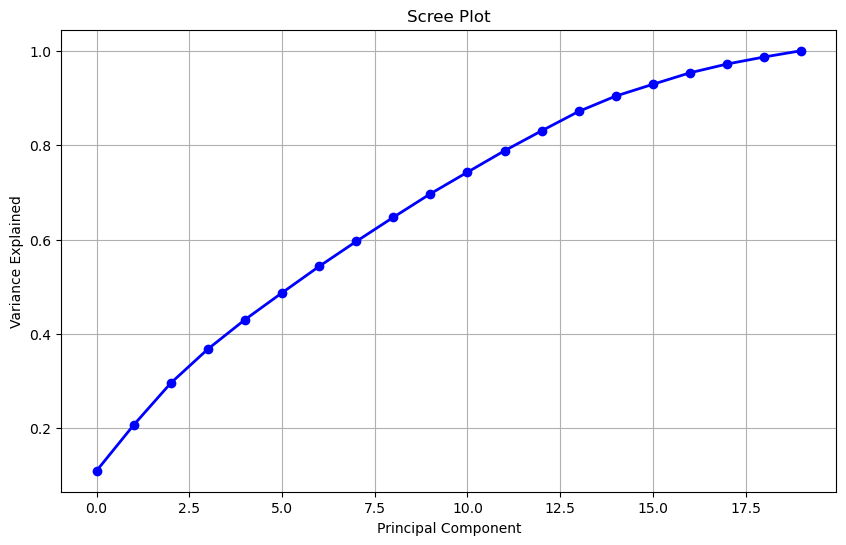

In [211]:
U, sigma, VT = svd(df_scaled, full_matrices=False)

# Step 1: Compute the total sum of the array
total_sum = np.sum(sigma)

# Step 2: Compute the cumulative sum of the array
cumulative_sum = np.cumsum(sigma)

# Step 3: Divide the cumulative sum array by the total sum
cumulative_sum_normalized = cumulative_sum / total_sum

#plot of singular values here
plt.figure(figsize=(10, 6))
plt.plot(cumulative_sum_normalized, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.savefig('./images/scree_plot.png')
plt.show()

In [201]:
#Principal Component Analysis
pca = PCA(n_components=3, random_state=42)
components = pca.fit_transform(df_scaled)
print(components)

[[-0.75333757  1.95014787  0.79029546]
 [-1.06393264  1.73627895  0.03247853]
 [-0.37814676  1.60489783  0.62131214]
 ...
 [ 3.19514844  2.31818176  0.8250874 ]
 [-1.46368625  1.56741168 -2.68162921]
 [ 5.22491579  2.26891021  2.4450088 ]]


[-1  0  1  2]


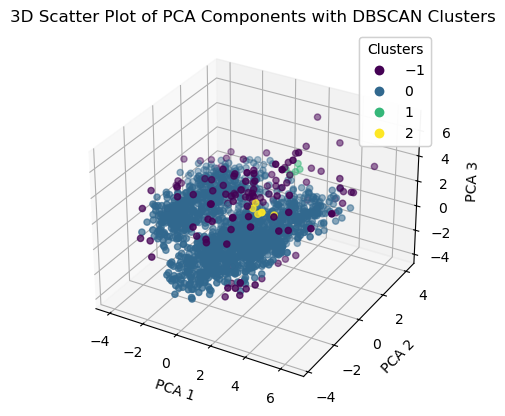

In [245]:
#DBSCAN Clustering
dbscan = DBSCAN(eps=0.65).fit(components)

df_clean['dbscan_cluster'] = dbscan.labels_

print(np.unique(dbscan.labels_))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=dbscan.labels_, cmap='viridis')

# Add labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot of PCA Components with DBSCAN Clusters')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show plot
plt.savefig('./images/pca_dbscan_3d_plot.png')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2]


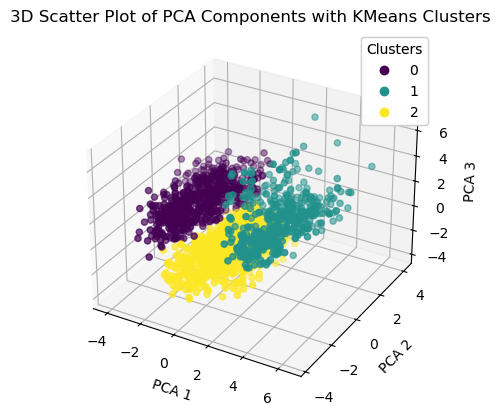

In [209]:
#KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(components)

df_clean['kmeans_cluster'] = kmeans.labels_

print(np.unique(kmeans.labels_))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=kmeans.labels_, cmap='viridis')

# Add labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot of PCA Components with KMeans Clusters')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show plot
plt.savefig('./images/pca_kmeans_3d_plot.png')
plt.show()